In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [3]:
def Plot_Scatter(y_test, y_predict, model_name = 'Model'):
    fig = plt.figure()
    fig.suptitle(model_name)
    plt.xlabel('y_test')
    plt.ylabel('y_predict')
    plt.scatter(y_test,y_predict)
    plt.show()

In [44]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/house_train.csv")
test = pd.read_csv("/content/drive/MyDrive/house_test.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

In [ ]:
df.corr

In [ ]:
df.info()

In [34]:
#df = df.drop(columns=['Alley', 'Street','Alley','LotShape','MiscFeature','SaleType','Utilities','LotConfig','LandSlope','Neighborhood','Fence','PoolQC','LandContour',
 #                     'BldgType','HouseStyle','MSZoning','Condition1','Condition2','RoofStyle','RoofMatl','GarageFinish','Functional','KitchenQual','GarageType'
 #                     ,'Exterior1st','Exterior2nd','Condition2','Condition2','Condition2','Condition2','Condition2','Condition2','Condition2','Condition2'])

In [79]:
numeric = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
           'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
numeric2 = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
           'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
df = df[numeric]

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1095 non-null   int64  
 1   LotFrontage    895 non-null    float64
 2   LotArea        1095 non-null   int64  
 3   OverallQual    1095 non-null   int64  
 4   OverallCond    1095 non-null   int64  
 5   YearBuilt      1095 non-null   int64  
 6   YearRemodAdd   1095 non-null   int64  
 7   MasVnrArea     1091 non-null   float64
 8   BsmtFinSF1     1095 non-null   int64  
 9   BsmtFinSF2     1095 non-null   int64  
 10  BsmtUnfSF      1095 non-null   int64  
 11  TotalBsmtSF    1095 non-null   int64  
 12  1stFlrSF       1095 non-null   int64  
 13  2ndFlrSF       1095 non-null   int64  
 14  LowQualFinSF   1095 non-null   int64  
 15  GrLivArea      1095 non-null   int64  
 16  BsmtFullBath   1095 non-null   int64  
 17  BsmtHalfBath   1095 non-null   int64  
 18  FullBath

In [155]:
X = df.drop(['SalePrice', 'YearBuilt','OverallQual','MasVnrArea','YrSold', 'TotRmsAbvGrd','MoSold',  'GarageArea', 'WoodDeckSF',  'BsmtFinSF1', 'BsmtFinSF2',
             'MSSubClass','PoolArea'],axis=1).values
y = df['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train= pd.DataFrame(X_train)
X_train.fillna(X_train.mean(), inplace=True)
X_test= pd.DataFrame(X_test)
X_test.fillna(X_test.mean(), inplace=True)

In [115]:
linmodel = LinearRegression().fit(X_train, y_train)

In [53]:
y_pred = linmodel.predict(X_test)

r2: 0.65
MAE:  26718.0876039175
RMSE:  48795.11345964151


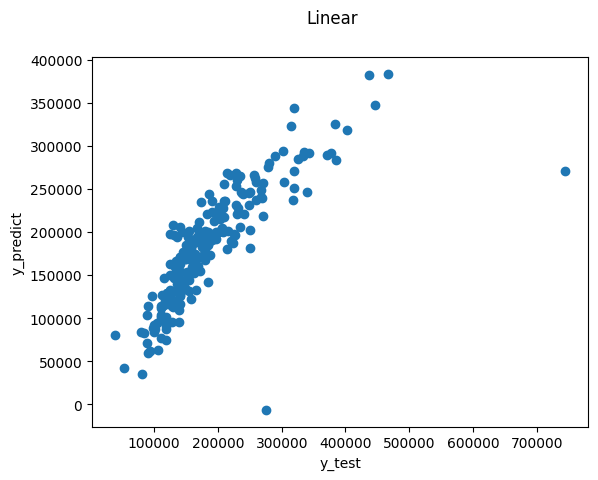

In [54]:
print("r2:", round(r2_score(y_test, y_pred), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))
Plot_Scatter(y_test, y_pred, "Linear")

In [55]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [56]:
y_pred2 = knn.predict(X_test)

In [ ]:
print("r2:", round(r2_score(y_test, y_pred2), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred2))
print("RMSE: ", mean_squared_error(y_test, y_pred2, squared=False))
Plot_Scatter(y_test, y_pred2, "knn")

In [ ]:
randomforest = RandomForestRegressor(n_estimators=1500)
randomforest.fit(X_train, y_train)

In [74]:
y_pred3 = randomforest.predict(X_test)

In [ ]:
print("r2:", round(r2_score(y_test, y_pred3), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred3))
print("RMSE: ", mean_squared_error(y_test, y_pred3, squared=False))
Plot_Scatter(y_test, y_pred3, "RandomForest")

In [61]:
from sklearn.preprocessing import StandardScaler
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
reg = make_pipeline(StandardScaler(),
SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [62]:
y_pred3 = reg.predict(X_test)

In [ ]:
print("r2:", round(r2_score(y_test, y_pred3), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred3))
print("RMSE: ", mean_squared_error(y_test, y_pred3, squared=False))
Plot_Scatter(y_test, y_pred3, "reg")

In [176]:
regtr = ExtraTreesRegressor(n_estimators=1000, random_state=0).fit(X_train, y_train)
regtr.score(X_test, y_test)

0.9691109151225326

In [177]:
y_pred3 = regtr.predict(X_test)

In [180]:
pd.DataFrame(y_pred3)

,0
0,191000.000
1,181000.000
2,99788.120
3,136973.371
4,157900.000
...,...
1090,176432.000
1091,182526.889
1092,115000.000
1093,189950.000


r2: 0.97
MAE:  3637.3001543378996
RMSE:  13694.574983157177


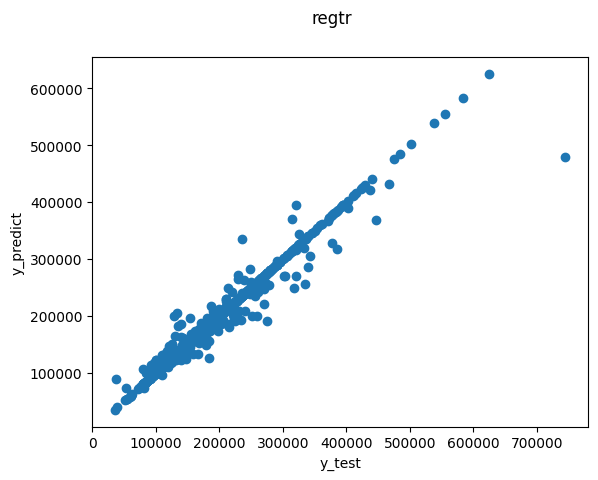

In [178]:
print("r2:", round(r2_score(y_test, y_pred3), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred3))
print("RMSE: ", mean_squared_error(y_test, y_pred3, squared=False))
Plot_Scatter(y_test, y_pred3, "regtr")

In [137]:
reggb = GradientBoostingRegressor(random_state=0)
reggb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [138]:
y_pred3 = reggb.predict(X_test)

r2: 0.86
MAE:  19076.568109443433
RMSE:  31555.777194718994


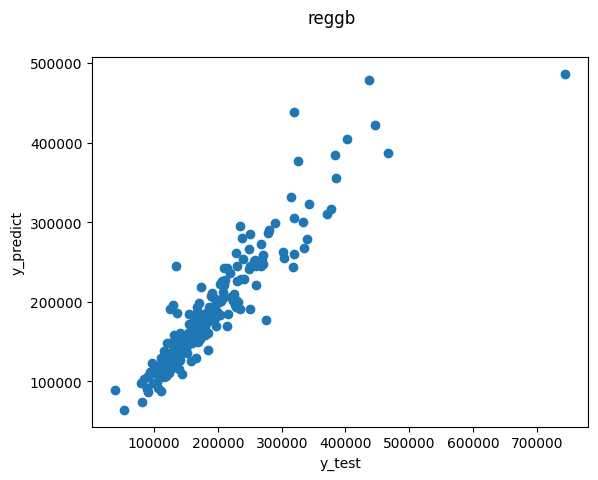

In [139]:
print("r2:", round(r2_score(y_test, y_pred3), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred3))
print("RMSE: ", mean_squared_error(y_test, y_pred3, squared=False))
Plot_Scatter(y_test, y_pred3, "reggb")

In [160]:
test = test[numeric2]
X_test = df.drop(['SalePrice', 'YearBuilt','OverallQual','MasVnrArea','YrSold', 'TotRmsAbvGrd','MoSold',  'GarageArea', 'WoodDeckSF',  'BsmtFinSF1', 'BsmtFinSF2',
             'MSSubClass','PoolArea'],axis=1).values
y_test = df['SalePrice'].values

In [171]:
y= pd.DataFrame(X_test)
y.fillna(y.mean(), inplace=True)

X= pd.DataFrame(X_test)
X.fillna(X.mean(), inplace=True)

y_test= pd.DataFrame(y_test)
y_test.fillna(y_test.mean(), inplace=True)
X_test= pd.DataFrame(X_test)
X_test.fillna(X_test.mean(), inplace=True)

In [183]:
regtr = ExtraTreesRegressor(n_estimators=1000, random_state=0).fit(X, y)
regtr.score(X, y)

1.0

In [184]:
y_pred3 = regtr.predict(X_test)

In [185]:
pd.DataFrame(y_pred3)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,43.000000,3182.0,5.0,2006.0,1330.0,1346.0,1504.0,0.0,0.0,1504.0,...,2.0,1.0,1.0,2005.0,2.0,20.0,0.0,0.0,0.0,0.0
1,78.000000,10140.0,6.0,1999.0,0.0,1040.0,1309.0,0.0,0.0,1309.0,...,3.0,1.0,1.0,1974.0,2.0,0.0,0.0,0.0,0.0,0.0
2,60.000000,9060.0,5.0,1950.0,356.0,560.0,698.0,560.0,0.0,1258.0,...,2.0,1.0,0.0,1939.0,1.0,0.0,0.0,0.0,0.0,0.0
3,70.394413,12342.0,5.0,1978.0,978.0,978.0,1422.0,0.0,0.0,1422.0,...,3.0,1.0,1.0,1960.0,1.0,0.0,36.0,0.0,0.0,600.0
4,75.000000,9750.0,6.0,1958.0,834.0,1442.0,1442.0,0.0,0.0,1442.0,...,4.0,1.0,0.0,1958.0,1.0,0.0,275.0,0.0,0.0,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,78.000000,9317.0,5.0,2006.0,1290.0,1314.0,1314.0,0.0,0.0,1314.0,...,3.0,1.0,1.0,2006.0,2.0,22.0,0.0,0.0,0.0,0.0
1091,65.000000,7804.0,3.0,1950.0,500.0,1122.0,1328.0,653.0,0.0,1981.0,...,4.0,1.0,2.0,1981.0,2.0,44.0,0.0,0.0,0.0,0.0
1092,60.000000,8172.0,7.0,1990.0,697.0,864.0,864.0,0.0,0.0,864.0,...,2.0,1.0,0.0,1957.0,2.0,0.0,0.0,0.0,0.0,0.0
1093,55.000000,7642.0,8.0,1998.0,912.0,912.0,912.0,514.0,0.0,1426.0,...,3.0,1.0,1.0,1925.0,1.0,240.0,0.0,0.0,0.0,0.0


ValueError: ignored